# FASHION MNIST DATA PREDICTION
__NOTE__ This data consist of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

# Importing Libraries

In [1]:
import os
import random
from io import BytesIO
from ipywidgets import widgets
from IPython.display import display
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Loading Data

In [2]:
fashion_df=tf.keras.datasets.fashion_mnist

In [3]:
# Splitting dataset into training and testing data
(training_images, training_labels), (test_images, test_labels) = fashion_df.load_data()

LABEL: 9

IMAGE PIXEL ARRAY:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

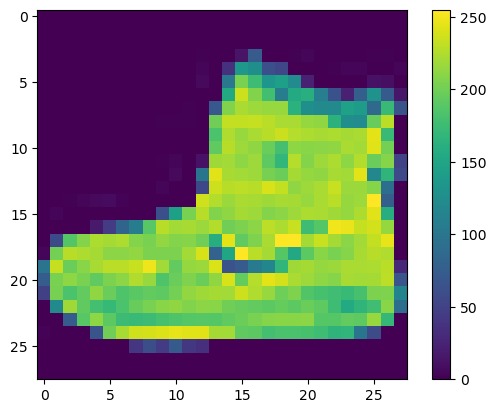

In [4]:
# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n\n{training_images[index]}\n\n')

# Visualize the image using the default colormap (viridis)
plt.imshow(training_images[index])
plt.colorbar()
plt.show()

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Check the Accuracy(this function is triggered when the below condition is true)
        threshold = 0.90
        # checking for accuracy but loss can be used too
        if logs['accuracy'] > threshold:
            # Stop if threshold is met
            print(f"\nAccuracy is greater than {threshold} so cancelling training!")
            self.model.stop_training = True

# Use "callbacks=[myCallback()]" in model.fit to run, 

In [6]:
# Normalize the values for test and train images since neuron network works well with normalized data
training_images = training_images / 255.0
test_images = test_images / 255.0

In [7]:
# Building classification model
model = tf.keras.models.Sequential([
    # define shape of data(thus the size of each image) 
    tf.keras.Input(shape=(28, 28)),
    # flatten reshapes data to a single array(1D arrray)
    tf.keras.layers.Flatten(),
    # First hidden layer with 128 neurons(units)
    tf.keras.layers.Dense(120, activation="relu"),
    # Output layer with 10 units
    tf.keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,410 (372.70 KB)

 Trainable params: 95,410 (372.70 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
dnn = model.fit(training_images, training_labels, epochs=12)

Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7745 - loss: 0.6460
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8623 - loss: 0.3826
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8755 - loss: 0.3418
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - accuracy: 0.8848 - loss: 0.3130
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.8883 - loss: 0.3006
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.8947 - loss: 0.2868
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.8993 - loss: 0.2685
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.9026 - loss: 0.2592
Epoch 9/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.9078 - loss: 0.2489
Epoch 10/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.9096 - loss: 0.2405
Epoch 11/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.9141 - loss: 0.2310 
Epoch 12/12
1

In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 0)
print(f"TEST LOSS: {test_loss}")
print(f"TEST ACCURACY: {test_accuracy}")

TEST LOSS: 0.3428444266319275
TEST ACCURACY: 0.8765000104904175


    This outcome isn't bad but it can still be improved:
        - By increasing the number of epochs.
        - By applying other techniques such as convolutions.

#### Visualizing Performance for Shallow Neuron Network

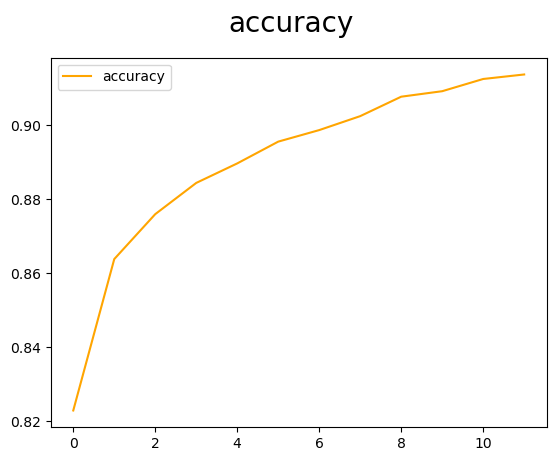

In [12]:
fig = plt.figure()
plt.plot(dnn.history['accuracy'], color = 'orange', label = 'accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

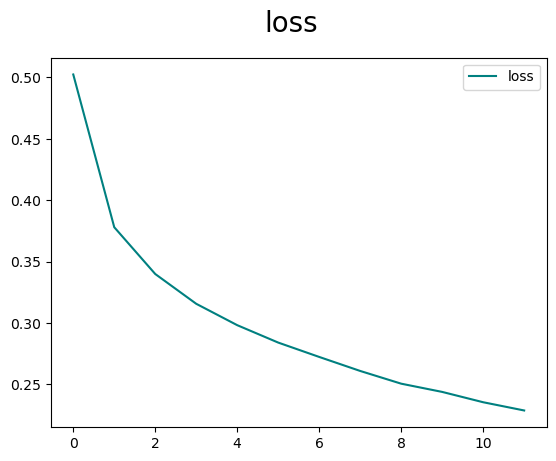

In [13]:
fig = plt.figure()
plt.plot(dnn.history['loss'], color = 'teal', label = 'loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

# Convolution Neuron Network
    The main concept of convolution condensing the image down to focus on only important features that distinquish what makes it a shirt, bag or shoes.

In [14]:
CNN_Model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    # first convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    # Second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    # flatten matrix to 1D array
    tf.keras.layers.Flatten(),
    
    # First dense layer
    tf.keras.layers.Dense(120, activation='relu'),

    # Output dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
CNN_Model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [16]:
# Gives you a table structure of the process
CNN_Model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │         192,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 230,898 (901.95 KB)

 Trainable params: 230,898 (901.95 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
hist = CNN_Model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7824 - loss: 0.6066
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8881 - loss: 0.3018
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9058 - loss: 0.2516
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9215 - loss: 0.2119
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9308 - loss: 0.1872


In [46]:
cnn_test_loss, cnn_test_accuracy = CNN_Model.evaluate(test_images, test_labels, verbose = 0)
print(f"TEST LOSS: {cnn_test_loss}")
print(f"TEST ACCURACY: {cnn_test_accuracy}\n")
print(f"After Training Model with 120 Units of neuron on 5 Epochs\ntest_loss: {round(cnn_test_loss*100)}% and test_accuracy: {round(cnn_test_accuracy*100)}% ")

TEST LOSS: 0.26296862959861755
TEST ACCURACY: 0.9031999707221985

After Training Model with 120 Units of neuron on 5 Epochs
test_loss: 26% and test_accuracy: 90% 


In [19]:
hist.history

{'accuracy': [0.8410000205039978,
  0.8917999863624573,
  0.9076833128929138,
  0.9190833568572998,
  0.9293000102043152],
 'loss': [0.4390570819377899,
  0.2954137921333313,
  0.24899399280548096,
  0.21633706986904144,
  0.190052792429924]}

### VISUALIZING PERFORMANCE

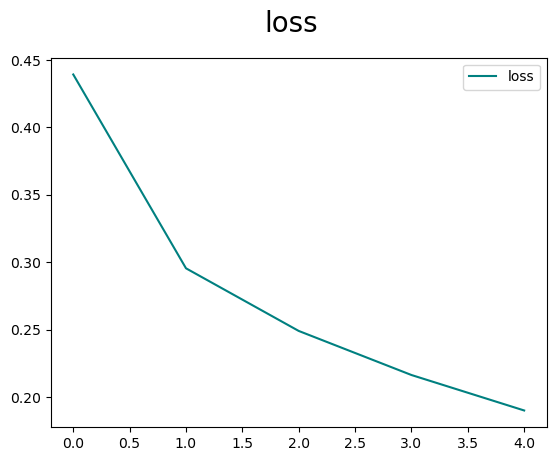

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

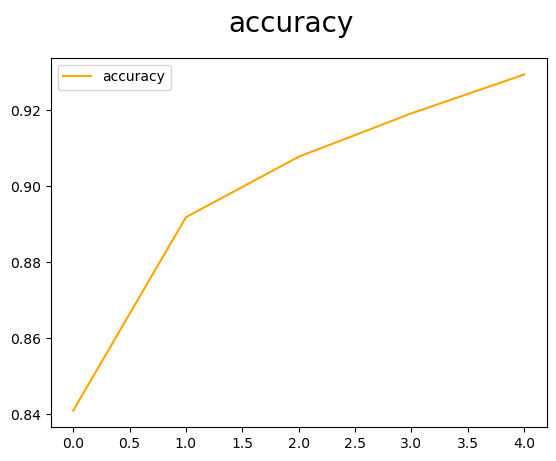

In [21]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'orange', label = 'accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [22]:
img_predict_index = 0
# Model has predicted the label for each image in the testing set
CCN_predict = CNN_Model.predict(test_images)
CCN_predict[img_predict_index]

# Getting the highest valve within array
print(f"PREDICTED IMAGE: {np.argmax(CCN_predict[img_predict_index])}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
PREDICTED IMAGE: 9


In [23]:
# Checking from test label set to confirm correctness
print(f"ACTUAL IMAGE LABEL: {test_labels[img_predict_index]}")

ACTUAL IMAGE LABEL: 9


### MODEL PREDICTION
    The prediction is an array of 10 digits, which is a distribution of our model confidence.
    Making a prediction on first 25 images from test images by looping through them.
    

In [109]:
# # Predicting first 25 images from data set
# class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# plt.figure(figsize=(10, 10))
# for i in range(25):
#     plt.subplot(5, 5, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid("off")
#     plt.imshow(test_images[i], cmap= plt.cm.binary)
#     predicted_label = np.argmax(CCN_predict[i])
#     actual_label = test_labels[i]
#     if predicted_label == actual_label:
#         color = "blue"
#     else:
#         color = "red"
#     plt.xlabel("{}, ({}) ".format(class_name[predicted_label], class_name[actual_label]), color = color)
    

#### Making Predictions on single image 

Text(0.5, 0, 'Predicted: Sandal, Actual: Ankle boot)')

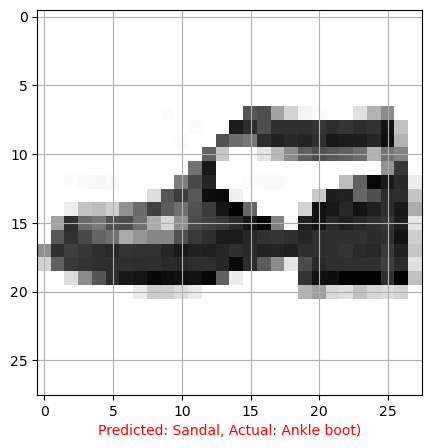

In [112]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Check index 800 and 23 to see what happens 
i = 23
plt.figure(figsize=(5, 5))
plt.grid("off")
plt.imshow(test_images[i], cmap= plt.cm.binary)
predicted_label = np.argmax(CCN_predict[i])
actual_label = test_labels[i]
if predicted_label == actual_label:
    color = "blue"
else:
    color = "red"
# plt.xlabel("{}, ({}) ".format(class_name[predicted_label], class_name[actual_label]), color = color)
plt.xlabel(f"Predicted: {class_name[predicted_label]}, Actual: {class_name[actual_label]})", color=color)